## Measurement Visualization

### Imports & Initializations 

In [37]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [38]:
trial_type = "pair"
confidence_threshold = 0.5
sensor_data = {}
tlx_data = {}
tlx_pw_data = {}

# Load data
data_path = os.path.join("data", f"{trial_type}", "measurements")
for file in os.listdir(data_path):
    print(os.path.join(data_path, file))
    if trial_type.startswith("solo"):
        if file.endswith("sensors.csv"):
            participant_id = file.split("_")[-2]
            measurements = pd.read_csv(os.path.join(data_path, file))
            measurements = measurements[measurements[f"confidence_{participant_id}"] > confidence_threshold]
            sensor_data[participant_id] = measurements
        elif file.endswith("tlx.csv"):
            participant_id = file.split("_")[-2]
            TLX_results = pd.read_csv(os.path.join(data_path, file))
            tlx_data[participant_id] = TLX_results['---NASA TLX V1.0.3 SINGLE TRIAL RATING SCALE ANSWERS---']
    elif trial_type.startswith("pair"):
        if file.endswith("sensors.csv"):
            participant_id1 = file.split("_")[-3]
            participant_id2 = file.split("_")[-2]
            print(participant_id1, participant_id2)
            measurements = pd.read_csv(os.path.join(data_path, file))
            measurements1 = measurements[measurements[f"confidence_{participant_id1}"] > confidence_threshold]
            sensor_data[participant_id1] = measurements1
            measurements2 = measurements[measurements[f"confidence_{participant_id2}"] > confidence_threshold]
            sensor_data[participant_id2] = measurements2
        elif file.endswith("tlx.csv"):
            participant_id = file.split("_")[-2]
            TLX_results = pd.read_csv(os.path.join(data_path, file))
            tlx_data[participant_id] = TLX_results['---NASA TLX V1.0.3 SINGLE TRIAL RATING SCALE ANSWERS---']
        elif file.endswith("tlx_pw.csv"):
            participant_id = file.split("_")[-3]
            TLX_results = pd.read_csv(os.path.join(data_path, file))
            tlx_pw_data[participant_id] = TLX_results['---NASA TLX V1.0.3 SINGLE TRIAL PAIRWISE ANSWERS---']

data\pair\measurements\pair_001_tlx_pw.csv
data\pair\measurements\pair_001_006_sensors.csv
001 006
data\pair\measurements\pair_001_tlx.csv
data\pair\measurements\pair_006_tlx_pw.csv
data\pair\measurements\pair_006_tlx.csv
data\pair\measurements\pair_002_tlx_pw.csv
data\pair\measurements\pair_002_tlx.csv
data\pair\measurements\pair_003_tlx_pw.csv
data\pair\measurements\pair_003_tlx.csv
data\pair\measurements\pair_002_003_sensors.csv
002 003


### Preliminary Exploratory Data Analysis

001
006
002
003
       diameter0_3d_001  diameter0_3d_006  diameter0_3d_002  diameter0_3d_003
count       2908.000000       6787.000000       8854.000000       7343.000000
mean           2.588900          3.368436          4.386081          1.348546
std            0.784582          0.451196          0.324492          0.204328
min            0.640546          0.593382          0.890364          0.480696
25%            2.704699          3.052689          4.150254          1.231011
50%            2.899779          3.243117          4.380018          1.387123
75%            3.050627          3.658657          4.610722          1.461449
max            3.886134          4.881126          5.189575          2.063636
       diameter1_3d_001  diameter1_3d_006  diameter1_3d_002  diameter1_3d_003
count       5062.000000       6872.000000       8890.000000       7826.000000
mean           4.112737          2.384651          4.150514          2.568087
std            1.097160          0.928252       

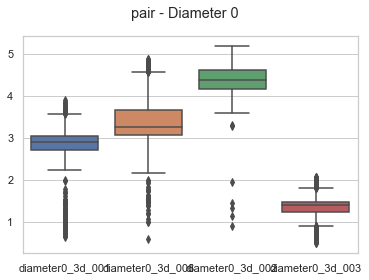

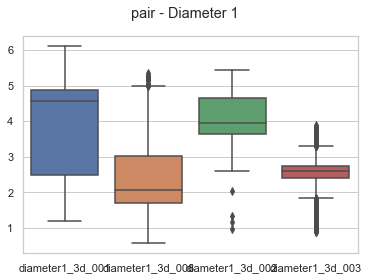

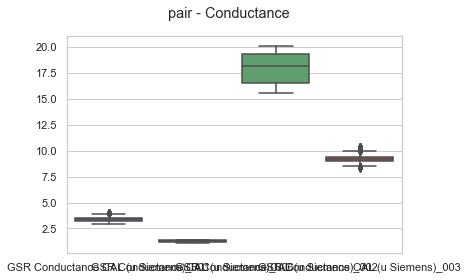

In [39]:
diameter0 = pd.DataFrame()
diameter1 = pd.DataFrame()
conductance = pd.DataFrame()

for participant_id in sensor_data.keys():
    print(participant_id)
    measurements = sensor_data[participant_id]
    diameter0 = pd.concat([diameter0, measurements[f'diameter0_3d_{participant_id}']], axis=1)
    diameter1 = pd.concat([diameter1, measurements[f'diameter1_3d_{participant_id}']], axis=1)
    conductance = pd.concat([conductance, measurements[f'GSR Conductance CAL (u Siemens)_{participant_id}']], axis=1)

print(diameter0.describe())
print(diameter1.describe())
print(conductance.describe())

# Plot
sns.set(style="whitegrid")
plt.suptitle(f"{trial_type} - Diameter 0")
sns.boxplot(data=diameter0)
plt.show()

sns.set(style="whitegrid")
plt.suptitle(f"{trial_type} - Diameter 1")
sns.boxplot(data=diameter1)
plt.show()

sns.set(style="whitegrid")
plt.suptitle(f"{trial_type} - Conductance")
sns.boxplot(data=conductance)
plt.show()

### Eye-tacking Data

In [40]:
pupil_capture_labels = [
    "confidence",
    "norm_pos_x",
    "norm_pos_y",
    "gaze_point_3d_x",
    "gaze_point_3d_y",
    "gaze_point_3d_z",
    "eye_center0_3d_x",
    "eye_center0_3d_y",
    "eye_center0_3d_z",
    "eye_center1_3d_x",
    "eye_center1_3d_y",
    "eye_center1_3d_z",
    "gaze_normal0_x",
    "gaze_normal0_y",
    "gaze_normal0_z",
    "gaze_normal1_x",
    "gaze_normal1_y",
    "gaze_normal1_z",
    "diameter0_2d",
    "diameter1_2d",
    "diameter0_3d",
    "diameter1_3d",
]


def plot_gaze_data(sensor_data, participant_id):
    data = sensor_data[participant_id]
    plt.figure(figsize=(10, 6))
    plt.scatter(data[f'norm_pos_x_{participant_id}'], data[f'norm_pos_y_{participant_id}'], alpha=0.5, marker='.')
    plt.title(f'Gaze Positions for Participant {participant_id}')
    plt.xlabel('Normalized Position X')
    plt.ylabel('Normalized Position Y')
    plt.grid(True)
    plt.show()

def plot_eye_diameter(sensor_data, participant_id, window_size=100, normalize_data=False, title=None):
    data = sensor_data[participant_id]

    if normalize_data:
        diameter0 = data[f'diameter0_3d_{participant_id}']
        diameter0 = (diameter0 - diameter0.mean()) / diameter0.std()
        diameter0 = diameter0.rolling(window=window_size, min_periods=1).mean()
        diameter1 = data[f'diameter1_3d_{participant_id}']
        diameter1 = (diameter1 - diameter1.mean()) / diameter1.std()
        diameter1 = diameter1.rolling(window=window_size, min_periods=1).mean()
    else:
        diameter0 = data[f'diameter0_3d_{participant_id}'].rolling(window=window_size, min_periods=1).mean()
        diameter1 = data[f'diameter1_3d_{participant_id}'].rolling(window=window_size, min_periods=1).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], diameter0, label='Right Eye')
    plt.plot(data['timestamp'], diameter1, label='Left Eye', alpha=0.7)
    if title:
        plt.title(title)
    else:
        title = f'Eye Diameter for Participant {participant_id}'
        if normalize_data:
            title += ' (Normalized)'
        if window_size > 1:
            title += f' (Window Size: {window_size})'
        plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Diameter (3D)')
    plt.legend()
    plt.show()

    return diameter0, diameter1


#### Graphs

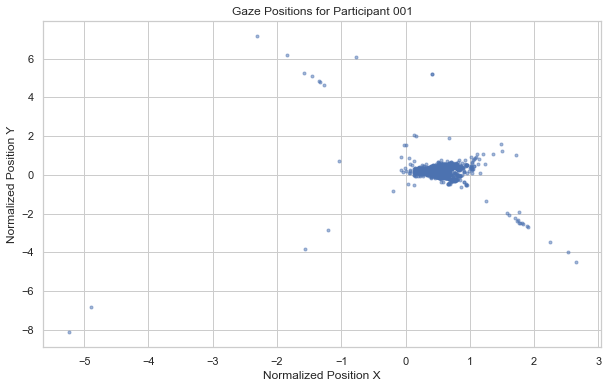

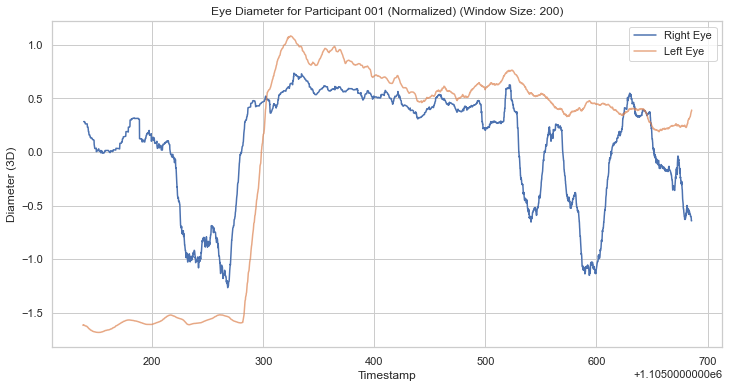

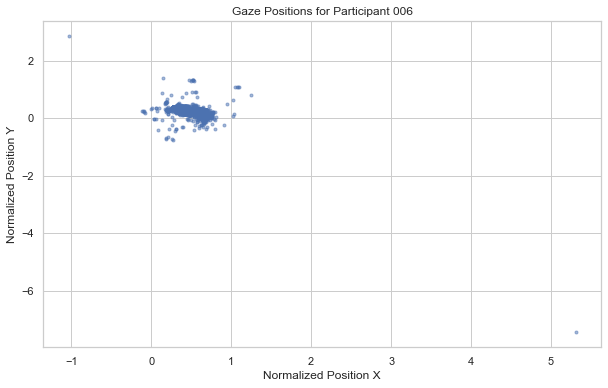

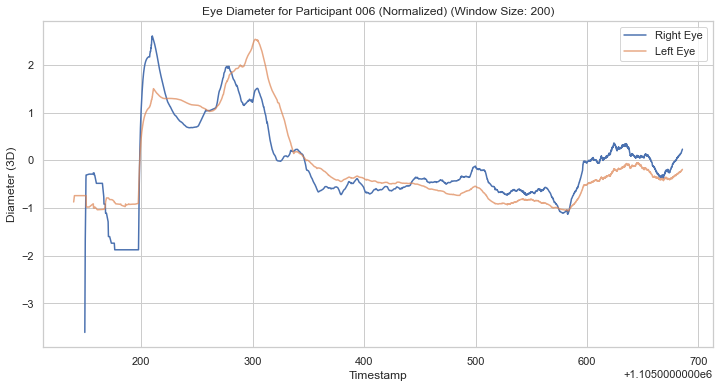

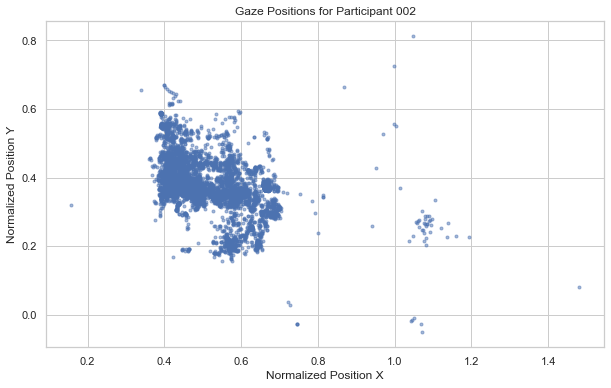

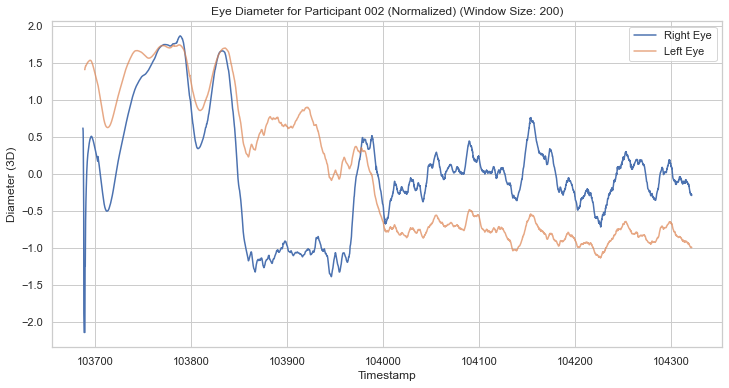

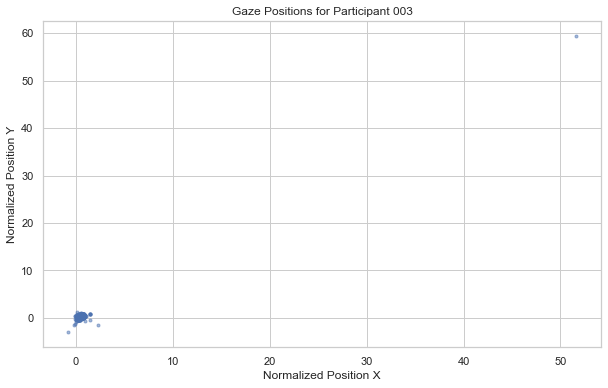

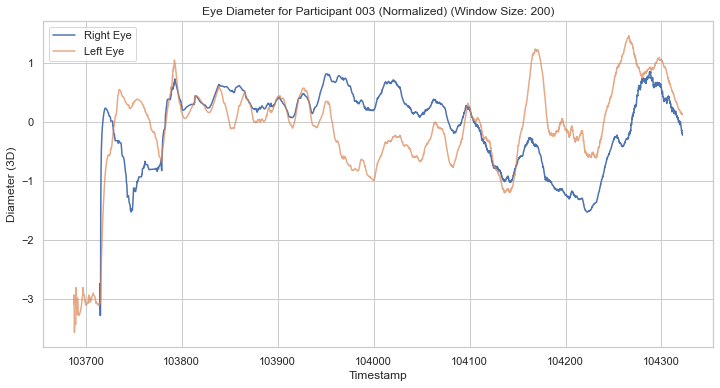

pair_eye_data saved to formatted_data


In [41]:
eye_data = {}

for participant_id in sensor_data.keys():
    plot_gaze_data(sensor_data, participant_id)
    diameter0, diameter1 = plot_eye_diameter(sensor_data, participant_id, window_size=200, normalize_data=True)
    eye_data[f"diameter0_{participant_id}"] = diameter0
    eye_data[f"diameter1_{participant_id}"] = diameter1

eye_data = pd.DataFrame(eye_data)
eye_data.to_csv(f"formatted_data/{trial_type}_eye_results.csv", index=False)
print(f"{trial_type}_eye_data saved to formatted_data")

### GSR Data

In [42]:
GSR_labels = [
    "Timestamp RAW (no units)",
    "Timestamp CAL (mSecs)",
    "System Timestamp CAL (mSecs)",
    "Wide Range Accelerometer X RAW (no units)",
    "Wide Range Accelerometer X CAL (m/(sec ^2))",
    "Wide Range Accelerometer Y RAW (no units)",
    "Wide Range Accelerometer Y CAL (m/(sec ^2))",
    "Wide Range Accelerometer Z RAW (no units)",
    "Wide Range Accelerometer Z CAL (m/(sec ^2))",
    "VSenseBatt RAW (no units)",
    "VSenseBatt CAL (m Volts)",
    "Internal ADC A13 RAW (no units)",
    "Internal ADC A13 CAL (m Volts)",
    "GSR RAW (no units)",
    "GSR CAL (kOhms)",
    "GSR Conductance CAL (u Siemens)",
]

def plot_gsr_data(sensor_data, participant_id, variable="GSR CAL (kOhms)", window_size=100, normalize_data=False, title=None):
    if participant_id not in sensor_data:
        print(f"No data for participant {participant_id}")
        return
    
    if normalize_data:
        data = sensor_data[participant_id][f'{variable}_{participant_id}']
        data = (data - data.mean()) / data.std()
        data = data.rolling(window=window_size, min_periods=1).mean()
    else:
        data = sensor_data[participant_id][f'{variable}_{participant_id}'].rolling(window=window_size, min_periods=1).mean()

    plt.figure(figsize=(15, 7))
    plt.plot(sensor_data[participant_id]['timestamp'], data, label=variable, color='blue', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel(variable)
    if title:
        plt.title(title)
    elif window_size == 1:
        plt.title(f'{variable} over Time for Participant {participant_id}')
    else:
        plt.title(f'Smoothed {variable} over Time for Participant {participant_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return data

#### Grpahs

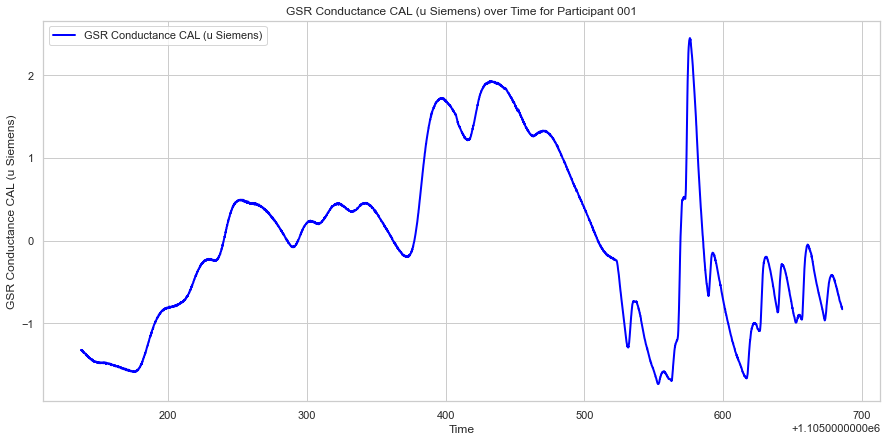

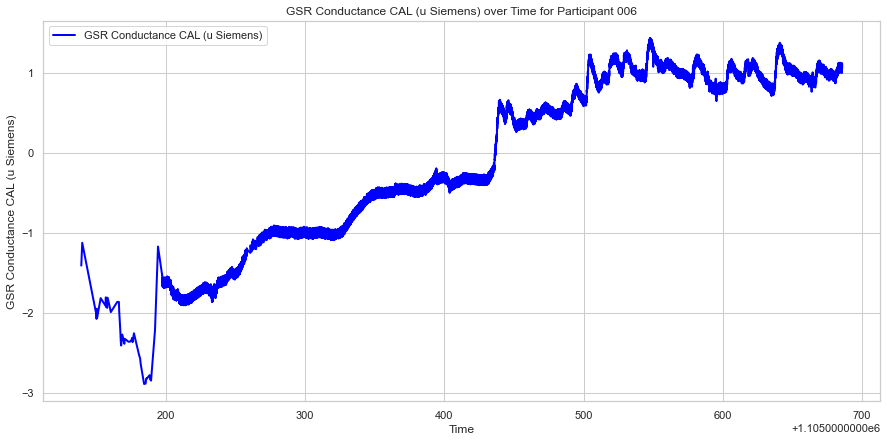

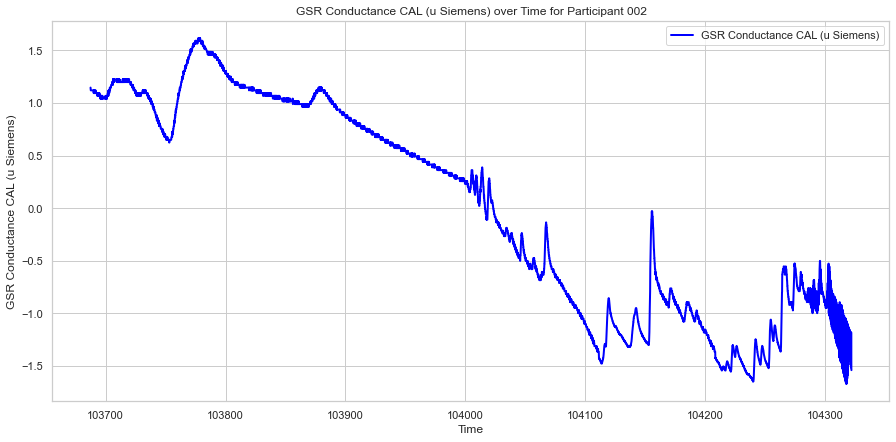

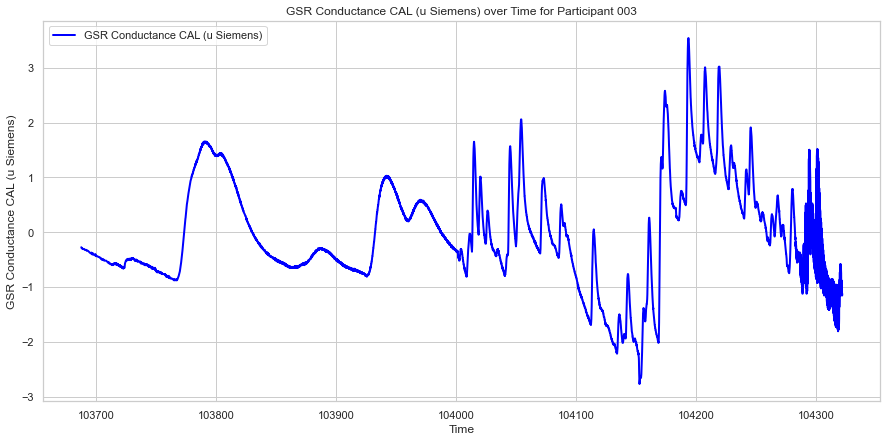

pair_gsr_data saved to formatted_data


In [43]:
gsr_data = {}

for participant_id in sensor_data.keys():
    variable = GSR_labels[-1]
    formatted_gsr = plot_gsr_data(sensor_data, participant_id, variable=variable, window_size=1, normalize_data=True)
    gsr_data[f"{variable}_{participant_id}"] = formatted_gsr

gsr_data = pd.DataFrame(gsr_data)
gsr_data.to_csv(f"formatted_data/{trial_type}_gsr_results.csv", index=False)
print(f"{trial_type}_gsr_data saved to formatted_data")

### NASA-TLX Data

In [44]:
TLX_results = {}

for participant_id in tlx_data.keys():
    TLX_results[f'Mental Demand {participant_id}'] = tlx_data[participant_id]['Mental Demand']
    TLX_results[f'Physical Demand {participant_id}'] = tlx_data[participant_id]['Physical Demand']
    TLX_results[f'Temporal Demand {participant_id}'] = tlx_data[participant_id]['Temporal Demand']
    TLX_results[f'Performance {participant_id}'] = tlx_data[participant_id]['Performance']
    TLX_results[f'Effort {participant_id}'] = tlx_data[participant_id]['Effort']
    TLX_results[f'Frustration {participant_id}'] = tlx_data[participant_id]['Frustration']

for participant_id in tlx_pw_data.keys():
    TLX_results[f'Mental Demand vs. Physical Demand {participant_id}'] = tlx_pw_data[participant_id]['Mental Demand vs. Physical Demand']
    TLX_results[f'Temporal Demand vs. Frustration {participant_id}'] = tlx_pw_data[participant_id]['Temporal Demand vs. Frustration']
    TLX_results[f'Mental Demand vs. Effort {participant_id}'] = tlx_pw_data[participant_id]['Mental Demand vs. Effort']
    TLX_results[f'Performance vs. Frustration {participant_id}'] = tlx_pw_data[participant_id]['Performance vs. Frustration']
    TLX_results[f'Performance vs. Temporal Demand {participant_id}'] = tlx_pw_data[participant_id]['Performance vs. Temporal Demand']
    TLX_results[f'Physical Demand vs. Temporal Demand {participant_id}'] = tlx_pw_data[participant_id]['Physical Demand vs. Temporal Demand']
    TLX_results[f'Physical Demand vs. Frustration {participant_id}'] = tlx_pw_data[participant_id]['Physical Demand vs. Frustration']
    TLX_results[f'Temporal Demand vs. Effort {participant_id}'] = tlx_pw_data[participant_id]['Temporal Demand vs. Effort']
    TLX_results[f'Frustration vs. Mental Demand {participant_id}'] = tlx_pw_data[participant_id]['Frustration vs. Mental Demand']
    TLX_results[f'Temporal Demand vs. Mental Demand {participant_id}'] = tlx_pw_data[participant_id]['Temporal Demand vs. Mental Demand']
    TLX_results[f'Physical Demand vs. Performance {participant_id}'] = tlx_pw_data[participant_id]['Physical Demand vs. Performance']
    TLX_results[f'Performance vs. Mental Demand {participant_id}'] = tlx_pw_data[participant_id]['Performance vs. Mental Demand']
    TLX_results[f'Effort vs. Physical Demand {participant_id}'] = tlx_pw_data[participant_id]['Effort vs. Physical Demand']
    TLX_results[f'Frustration vs. Effort {participant_id}'] = tlx_pw_data[participant_id]['Frustration vs. Effort']
    TLX_results[f'Effort vs. Performance {participant_id}'] = tlx_pw_data[participant_id]['Effort vs. Performance']


values = [float(TLX_results[f'Mental Demand {participant_id}']) for participant_id in tlx_data.keys()] 
mean = sum(values) / len(values)  
TLX_results['Mean Mental Demand'] = mean

values = [float(TLX_results[f'Physical Demand {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Physical Demand'] = mean

values = [float(TLX_results[f'Temporal Demand {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Temporal Demand'] = mean

values = [float(TLX_results[f'Performance {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Performance'] = mean

values = [float(TLX_results[f'Effort {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Effort'] = mean

values = [float(TLX_results[f'Frustration {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Frustration'] = mean

print(TLX_results)

{'Mental Demand 001': '20', 'Physical Demand 001': '5', 'Temporal Demand 001': '15', 'Performance 001': '15', 'Effort 001': '25', 'Frustration 001': '5', 'Mental Demand 006': '40', 'Physical Demand 006': '15', 'Temporal Demand 006': '15', 'Performance 006': '15', 'Effort 006': '10', 'Frustration 006': '10', 'Mental Demand 002': '40', 'Physical Demand 002': '20', 'Temporal Demand 002': '55', 'Performance 002': '45', 'Effort 002': '50', 'Frustration 002': '50', 'Mental Demand 003': '35', 'Physical Demand 003': '5', 'Temporal Demand 003': '45', 'Performance 003': '25', 'Effort 003': '40', 'Frustration 003': '15', 'Mental Demand vs. Physical Demand 001': 'Mental Demand', 'Temporal Demand vs. Frustration 001': 'Temporal Demand', 'Mental Demand vs. Effort 001': 'Effort', 'Performance vs. Frustration 001': 'Performance', 'Performance vs. Temporal Demand 001': 'Performance', 'Physical Demand vs. Temporal Demand 001': 'Temporal Demand', 'Physical Demand vs. Frustration 001': 'Physical Demand', 

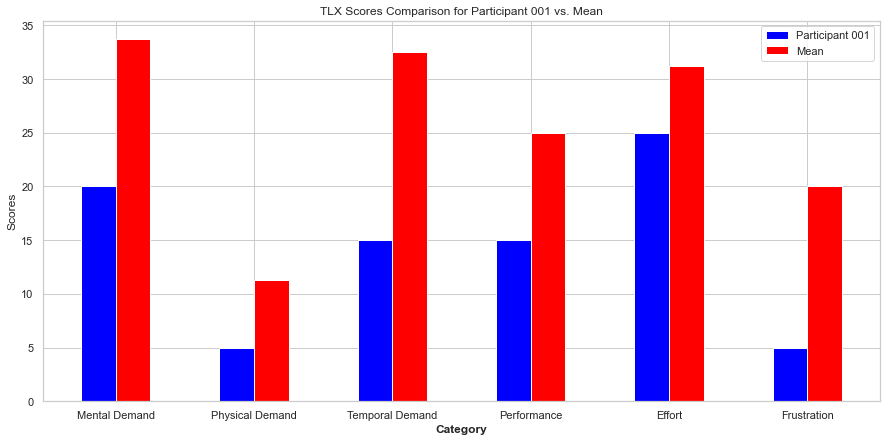

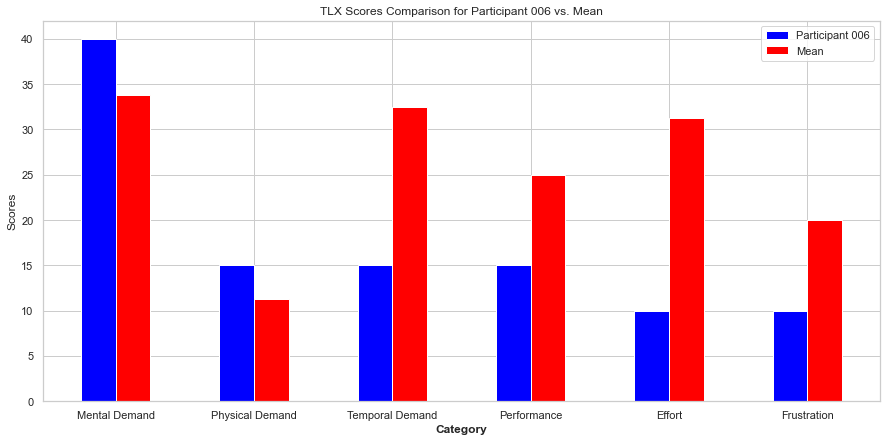

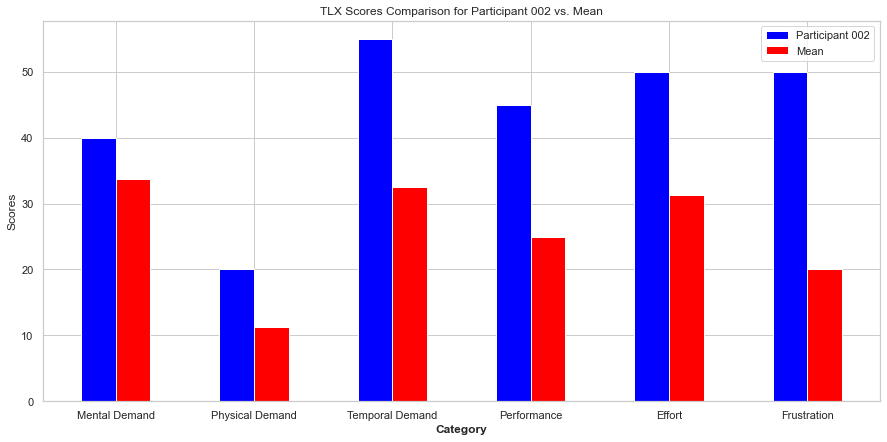

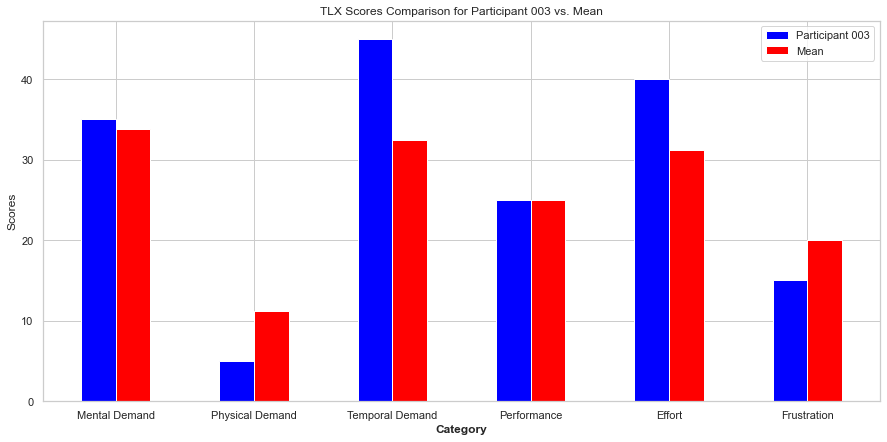

In [45]:
for participant_id in tlx_data.keys():
    plt.figure(figsize=(15, 7))
    
    # Individual participant scores
    mental = float(TLX_results[f'Mental Demand {participant_id}'])
    physical = float(TLX_results[f'Physical Demand {participant_id}'])
    temporal = float(TLX_results[f'Temporal Demand {participant_id}'])
    performance = float(TLX_results[f'Performance {participant_id}'])
    effort = float(TLX_results[f'Effort {participant_id}'])
    frustration = float(TLX_results[f'Frustration {participant_id}'])

    # Mean scores
    mean_mental = float(TLX_results['Mean Mental Demand'])
    mean_physical = float(TLX_results['Mean Physical Demand'])
    mean_temporal = float(TLX_results['Mean Temporal Demand'])
    mean_performance = float(TLX_results['Mean Performance'])
    mean_effort = float(TLX_results['Mean Effort'])
    mean_frustration = float(TLX_results['Mean Frustration'])

    labels = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']
    participant_values = [mental, physical, temporal, performance, effort, frustration]
    mean_values = [mean_mental, mean_physical, mean_temporal, mean_performance, mean_effort, mean_frustration]

    # Set position of bar on X axis
    r1 = np.arange(len(labels))
    r2 = [x + 0.25 for x in r1]
    
    # Make the plot
    plt.bar(r1, participant_values, color='blue', width=0.25, label=f'Participant {participant_id}')
    plt.bar(r2, mean_values, color='red', width=0.25, label='Mean')
    
    # Add xticks on the middle of the group bars
    plt.xlabel('Category', fontweight='bold')
    plt.xticks([r + 0.125 for r in range(len(labels))], labels)
    plt.ylabel('Scores')
    plt.title(f'TLX Scores Comparison for Participant {participant_id} vs. Mean')
    
    # Create legend & Show graphic
    plt.legend()
    plt.show()


In [46]:
def rating_scale_score(TLX_results, participant_id):
    mental = float(TLX_results[f'Mental Demand {participant_id}'])
    physical = float(TLX_results[f'Physical Demand {participant_id}'])
    temporal = float(TLX_results[f'Temporal Demand {participant_id}'])
    performance = float(TLX_results[f'Performance {participant_id}'])
    effort = float(TLX_results[f'Effort {participant_id}'])
    frustration = float(TLX_results[f'Frustration {participant_id}'])

    return (mental + physical + temporal + performance + effort + frustration) / 6

    

def rating_pairwise_score(TLX_results, participant_id):
    subscale_weights = {
        'Mental Demand': 0,
        'Physical Demand': 0,
        'Temporal Demand': 0,
        'Performance': 0,
        'Effort': 0,
        'Frustration': 0
    }
    if (TLX_results[f'Mental Demand vs. Physical Demand {participant_id}'] == 'Mental Demand'):
        subscale_weights['Mental Demand'] += 1
    else:
        subscale_weights['Physical Demand'] += 1

    if (TLX_results[f'Temporal Demand vs. Frustration {participant_id}'] == 'Temporal Demand'):
        subscale_weights['Temporal Demand'] += 1
    else:
        subscale_weights['Frustration'] += 1

    if (TLX_results[f'Mental Demand vs. Effort {participant_id}'] == 'Mental Demand'):
        subscale_weights['Mental Demand'] += 1
    else:
        subscale_weights['Effort'] += 1

    if (TLX_results[f'Performance vs. Frustration {participant_id}'] == 'Performance'):
        subscale_weights['Performance'] += 1
    else:
        subscale_weights['Frustration'] += 1

    if (TLX_results[f'Performance vs. Temporal Demand {participant_id}'] == 'Performance'):
        subscale_weights['Performance'] += 1
    else:
        subscale_weights['Temporal Demand'] += 1

    if (TLX_results[f'Physical Demand vs. Temporal Demand {participant_id}'] == 'Physical Demand'):
        subscale_weights['Physical Demand'] += 1
    else:
        subscale_weights['Temporal Demand'] += 1

    if (TLX_results[f'Physical Demand vs. Frustration {participant_id}'] == 'Physical Demand'):
        subscale_weights['Physical Demand'] += 1
    else:
        subscale_weights['Frustration'] += 1

    if (TLX_results[f'Temporal Demand vs. Effort {participant_id}'] == 'Temporal Demand'):
        subscale_weights['Temporal Demand'] += 1
    else:
        subscale_weights['Effort'] += 1

    if (TLX_results[f'Frustration vs. Mental Demand {participant_id}'] == 'Frustration'):
        subscale_weights['Frustration'] += 1
    else:
        subscale_weights['Mental Demand'] += 1

    if (TLX_results[f'Temporal Demand vs. Mental Demand {participant_id}'] == 'Temporal Demand'):
        subscale_weights['Temporal Demand'] += 1
    else:
        subscale_weights['Mental Demand'] += 1

    if (TLX_results[f'Physical Demand vs. Performance {participant_id}'] == 'Physical Demand'):
        subscale_weights['Physical Demand'] += 1
    else:
        subscale_weights['Performance'] += 1

    if (TLX_results[f'Performance vs. Mental Demand {participant_id}'] == 'Performance'):
        subscale_weights['Performance'] += 1
    else:
        subscale_weights['Mental Demand'] += 1

    if (TLX_results[f'Effort vs. Physical Demand {participant_id}'] == 'Effort'):
        subscale_weights['Effort'] += 1
    else:
        subscale_weights['Physical Demand'] += 1

    if (TLX_results[f'Frustration vs. Effort {participant_id}'] == 'Frustration'):
        subscale_weights['Frustration'] += 1
    else:
        subscale_weights['Effort'] += 1

    if (TLX_results[f'Effort vs. Performance {participant_id}'] == 'Effort'):
        subscale_weights['Effort'] += 1
    else:
        subscale_weights['Performance'] += 1

    mental = float(TLX_results[f'Mental Demand {participant_id}'])
    physical = float(TLX_results[f'Physical Demand {participant_id}'])
    temporal = float(TLX_results[f'Temporal Demand {participant_id}'])
    performance = float(TLX_results[f'Performance {participant_id}'])
    effort = float(TLX_results[f'Effort {participant_id}'])
    frustration = float(TLX_results[f'Frustration {participant_id}'])

    output = 0
    output += mental * subscale_weights['Mental Demand']
    output += physical * subscale_weights['Physical Demand']
    output += temporal * subscale_weights['Temporal Demand']
    output += performance * subscale_weights['Performance']
    output += effort * subscale_weights['Effort']
    output += frustration * subscale_weights['Frustration']

    return output / 15


In [47]:
if trial_type.startswith("solo"):
    for participant_id in tlx_data.keys():
        print(f"Participant {participant_id} Rating Scale Score: {rating_scale_score(TLX_results, participant_id)}")
        TLX_results[f'Rating Scale Score {participant_id}'] = rating_scale_score(TLX_results, participant_id)
elif trial_type.startswith("pair"):
    for participant_id in tlx_data.keys():
        print(f"Participant {participant_id} Rating Scale Score: {rating_scale_score(TLX_results, participant_id)}")
        TLX_results[f'Rating Scale Score {participant_id}'] = rating_scale_score(TLX_results, participant_id)
        print(f"Participant {participant_id} Pairwise Score: {rating_pairwise_score(TLX_results, participant_id)}")
        TLX_results[f'Pairwise Score {participant_id}'] = rating_pairwise_score(TLX_results, participant_id)

Participant 001 Rating Scale Score: 14.166666666666666
Participant 001 Pairwise Score: 18.0
Participant 006 Rating Scale Score: 17.5
Participant 006 Pairwise Score: 22.0
Participant 002 Rating Scale Score: 43.333333333333336
Participant 002 Pairwise Score: 47.666666666666664
Participant 003 Rating Scale Score: 27.5
Participant 003 Pairwise Score: 33.666666666666664


## Saving Formatted Data

In [48]:
# save to \formatted_data
TLX_results_df = pd.DataFrame(TLX_results, index=[0])
TLX_results_df.to_csv(os.path.join("formatted_data", f"{trial_type}_TLX_results.csv"), index=False)
print("TLX results saved to formatted_data")

TLX results saved to formatted_data
